In [86]:
### Key buesiness question 4 : Which are the top 10 pizza restaurants by rating? ###

import sqlite3
import pandas as pd
conn = sqlite3.connect('../databases/takeaway.db')
cur = conn.cursor()

# SQL query to find duplicates
query = """
SELECT DISTINCT categories_restaurants.restaurant_id, restaurants.ratings, restaurants.ratingsNumber, restaurants.name, restaurants.address, restaurants.city
FROM categories_restaurants
INNER JOIN restaurants
ON categories_restaurants.restaurant_id = restaurants.primarySlug
WHERE categories_restaurants.category_id LIKE '%pizza%' AND ratingsNumber >= 10
ORDER BY restaurants.ratings DESC
LIMIT 10;
"""

result = cur.execute(query).fetchall()  
for row in result:
    print(row)  

df = pd.DataFrame(result)
df

('veziroglu', 5, 455, 'Veziroglu', 'Franklin Rooseveltlaan 100', 'Vilvorde')
('trend-kebab-pizzeria', 5, 165, 'Trend Kebab & Pizzeria', 'Marktstraat 1', 'Maaseik')
('kebap-pizza-de-brug', 5, 312, 'Kebap - Pizza De Brug', 'Sint-Truidersteenweg 46', 'Hasselt')
('eethuis-carlos-aarschot', 5, 599, 'De Echte Eethuis Carlos', 'Herseltsesteenweg 207', 'Aarschot')
('pyramide-hamont', 4.9, 45, 'Pyramide', 'Stationsstraat 61', 'Hamont')
('am-princesse', 4.9, 367, 'Am Princesse', 'Chaussée de Louvain 343', 'Schaerbeek')
('pizzeria-zirar-saint-denis', 4.9, 529, 'Pizzeria Zirar Saint-Denis', 'Chaussée de Bruxelles 10', 'Forest')
('snack-emes', 4.9, 498, 'Snack Pizzeria Izmir', 'Grote Markt 32', 'Vilvoorde')
('de-notenboom', 4.9, 706, 'De Notenboom', 'Langestraat 139', 'Nieuwpoort')
('pizza-lesta', 4.9, 372, "Pizza L'Esta", 'Van de Perrelei 7', 'Hoboken')


,0,1,2,3,4,5
0,veziroglu,5.0,455,Veziroglu,Franklin Rooseveltlaan 100,Vilvorde
1,trend-kebab-pizzeria,5.0,165,Trend Kebab & Pizzeria,Marktstraat 1,Maaseik
2,kebap-pizza-de-brug,5.0,312,Kebap - Pizza De Brug,Sint-Truidersteenweg 46,Hasselt
3,eethuis-carlos-aarschot,5.0,599,De Echte Eethuis Carlos,Herseltsesteenweg 207,Aarschot
4,pyramide-hamont,4.9,45,Pyramide,Stationsstraat 61,Hamont
5,am-princesse,4.9,367,Am Princesse,Chaussée de Louvain 343,Schaerbeek
6,pizzeria-zirar-saint-denis,4.9,529,Pizzeria Zirar Saint-Denis,Chaussée de Bruxelles 10,Forest
7,snack-emes,4.9,498,Snack Pizzeria Izmir,Grote Markt 32,Vilvoorde
8,de-notenboom,4.9,706,De Notenboom,Langestraat 139,Nieuwpoort
9,pizza-lesta,4.9,372,Pizza L'Esta,Van de Perrelei 7,Hoboken


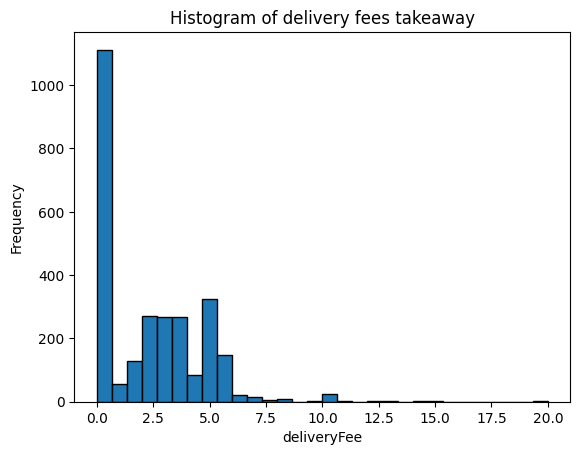

In [92]:
### As part of open end question 4 : How do delivery fees vary across platforms and locations? #####
# TAKEAWAY #
import sqlite3
import pandas as pd
conn = sqlite3.connect('../databases/takeaway.db')
cur = conn.cursor()

query = """
SELECT deliveryFee, restaurant_id
FROM restaurants
WHERE supportsDelivery = 1
;
"""
result = cur.execute(query).fetchall()  
columns = [desc[0] for desc in cur.description]
df = pd.DataFrame(result, columns=columns)

import matplotlib.pyplot as plt
plt.hist(df['deliveryFee'], bins=30, edgecolor='black')
plt.xlabel('deliveryFee')
plt.ylabel('Frequency')
plt.title('Histogram of delivery fees takeaway')
plt.show()

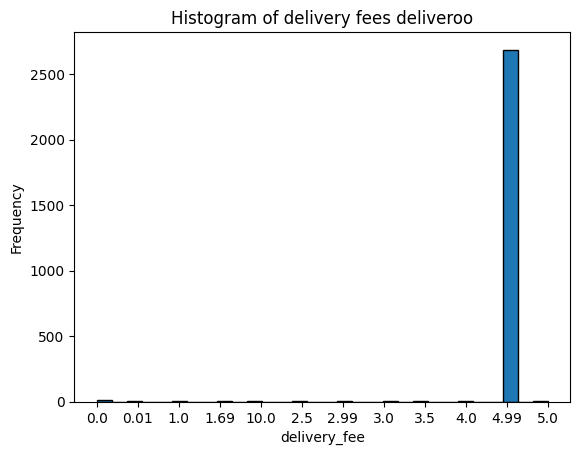

In [100]:
### As part of open end question 4 : How do delivery fees vary across platforms and locations? ###
# DELIVEROO #
import sqlite3
import pandas as pd
conn = sqlite3.connect('../databases/deliveroo.db')
cur = conn.cursor()

query = """
SELECT delivery_fee, id
FROM restaurants
WHERE fulfillment_method LIKE '%DELIVERY%'
;
"""
result = cur.execute(query).fetchall()  
columns = [desc[0] for desc in cur.description]
df = pd.DataFrame(result, columns=columns)
df_sorted = df.sort_values(by='delivery_fee')

import matplotlib.pyplot as plt
plt.hist(df_sorted['delivery_fee'], bins=30, edgecolor='black')
plt.xlabel('delivery_fee')
plt.ylabel('Frequency')
plt.title('Histogram of delivery fees deliveroo')
plt.show()

In [ ]:
### As part of open end question 4 : How do delivery fees vary across platforms and locations? ###
# UBEREATS : no detail on delivery fee !!! #


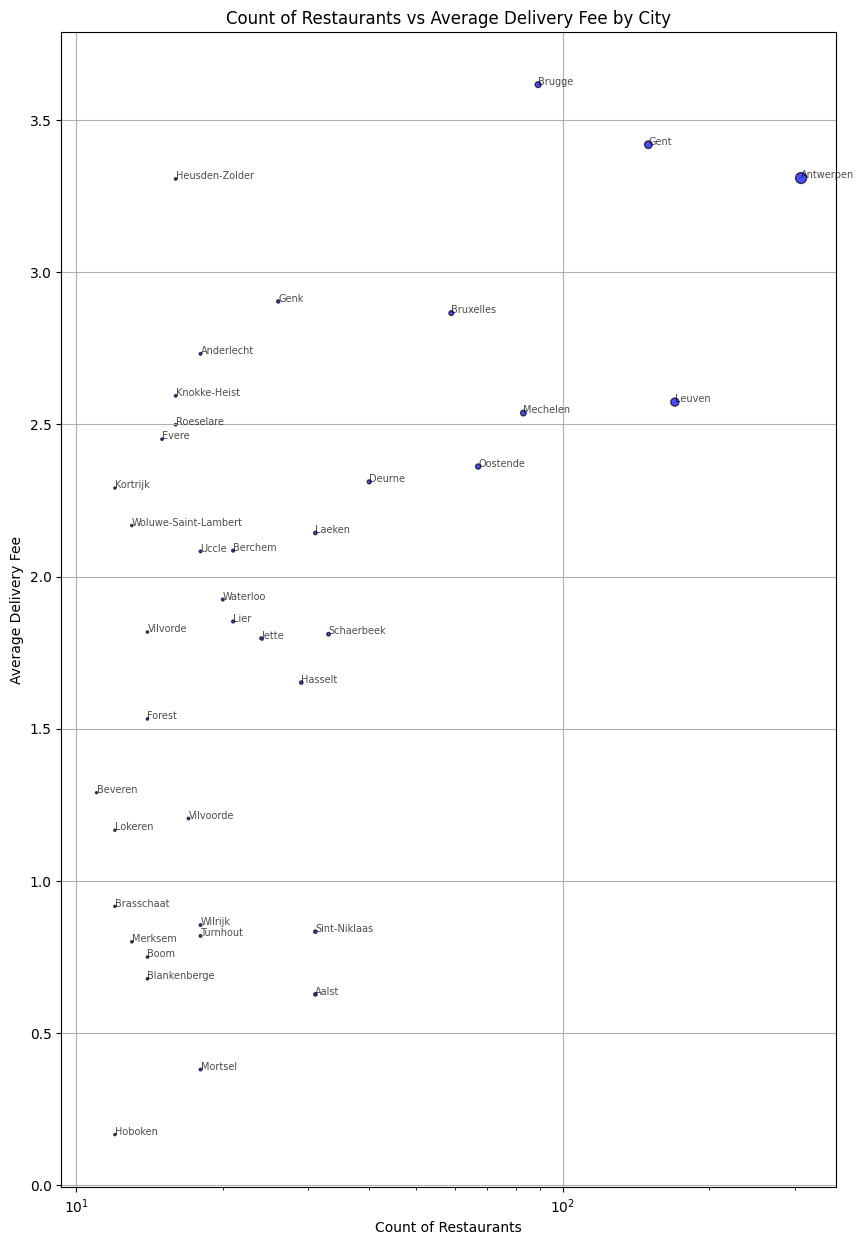

In [ ]:
### As part of open end question 4 : How do delivery fees vary across platforms and locations? #####
# TAKEAWAY #
import sqlite3
import pandas as pd
conn = sqlite3.connect('../databases/takeaway.db')
cur = conn.cursor()

query = """
SELECT AVG(deliveryFee) AS average_delivery_fee, city, COUNT(restaurant_id) AS COUNT
FROM restaurants
WHERE supportsDelivery = 1 
GROUP BY city
HAVING COUNT > 10
ORDER BY COUNT DESC
;
"""
result = cur.execute(query).fetchall()  
columns = [desc[0] for desc in cur.description]
df = pd.DataFrame(result, columns=columns)

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 15))  
plt.scatter(df['COUNT'], df['average_delivery_fee'],  s=df['COUNT'] / 5, color='blue', edgecolor='black', alpha=0.7)
plt.xscale('log')
plt.xlabel('Count of Restaurants')
plt.ylabel('Average Delivery Fee')
plt.title('Count of Restaurants vs Average Delivery Fee by City')
# Optional: Annotating the points with city names
for i, city in enumerate(df['city']):
    plt.text(df['COUNT'].iloc[i], df['average_delivery_fee'].iloc[i], city, fontsize=7, alpha=0.7)
plt.grid(True)
plt.show()

In [ ]:

CREATE TABLE restaurants (
  primarySlug TEXT PRIMARY KEY,
  restaurant_id,
  name TEXT,
  address TEXT,
  city TEXT,
  supportsDelivery TEXT,
  supportsPickup,
  paymentMethods TEXT,
  ratings NUMBER,
  ratingsNumber INTEGER,
  deliveryScoober TEXT,
  durationRangeMin INTEGER,
  durationRangeMax INTEGER,
  deliveryFee,
  minOrder INTEGER,
  longitude NUMBER,
  latitude NUMBER
)
